In [1]:
import cv2 as cv
import cv2
from pathlib import Path
import numpy as np

In [13]:
train_paths = list(Path("data/set-A_train").rglob("*.jpg"))
def parse_image_path(image_path):
    image_name = image_path.stem
    if "Empty" in image_name:
        return "Empty"
    date, time, location, heading, ship = image_name.split("_")
    return heading + "_" + ship
labels = [parse_image_path(image_path) for image_path in train_paths]

In [7]:
from collections import Counter
Counter(labels, )

Counter({'Empty': 303,
         'Heading-East_Ship-Cruiser-2': 132,
         'Heading-East_Ship-Cruiser-3': 127,
         'Heading-East_Ship-Cruiser-1': 124,
         'Heading-East_Ship-Fishing-1': 118,
         'Heading-East_Ship-Freighter': 114,
         'Heading-West_Ship-Freighter': 111,
         'Heading-West_Ship-Cruiser-2': 109,
         'Heading-West_Ship-Cruiser-1': 106,
         'Heading-West_Ship-Cruiser-3': 104,
         'Heading-East_Ship-Fishing-2': 103,
         'Heading-West_Ship-Fishing-1': 93,
         'Heading-West_Ship-Fishing-2': 91})

In [9]:
test_labels = [parse_image_path(image_path) for image_path in Path("data/set-B_test").rglob("*.jpg")]
Counter(test_labels)

Counter({'Empty': 76,
         'Heading-West_Ship-Cruiser-2': 31,
         'Heading-East_Ship-Cruiser-2': 31,
         'Heading-West_Ship-Fishing-1': 30,
         'Heading-West_Ship-Cruiser-1': 29,
         'Heading-East_Ship-Fishing-2': 28,
         'Heading-East_Ship-Cruiser-3': 27,
         'Heading-West_Ship-Freighter': 27,
         'Heading-West_Ship-Cruiser-3': 27,
         'Heading-West_Ship-Fishing-2': 26,
         'Heading-East_Ship-Freighter': 24,
         'Heading-East_Ship-Cruiser-1': 22,
         'Heading-East_Ship-Fishing-1': 22})

45322.2

In [10]:
set(labels) - set(test_labels)

set()

In [11]:
set(test_labels) - set(labels)

set()

In [59]:
img = cv.imread('data/set-A_train/20171105_185419_Location-1B_Heading-East_Ship-Fishing-1.jpg')

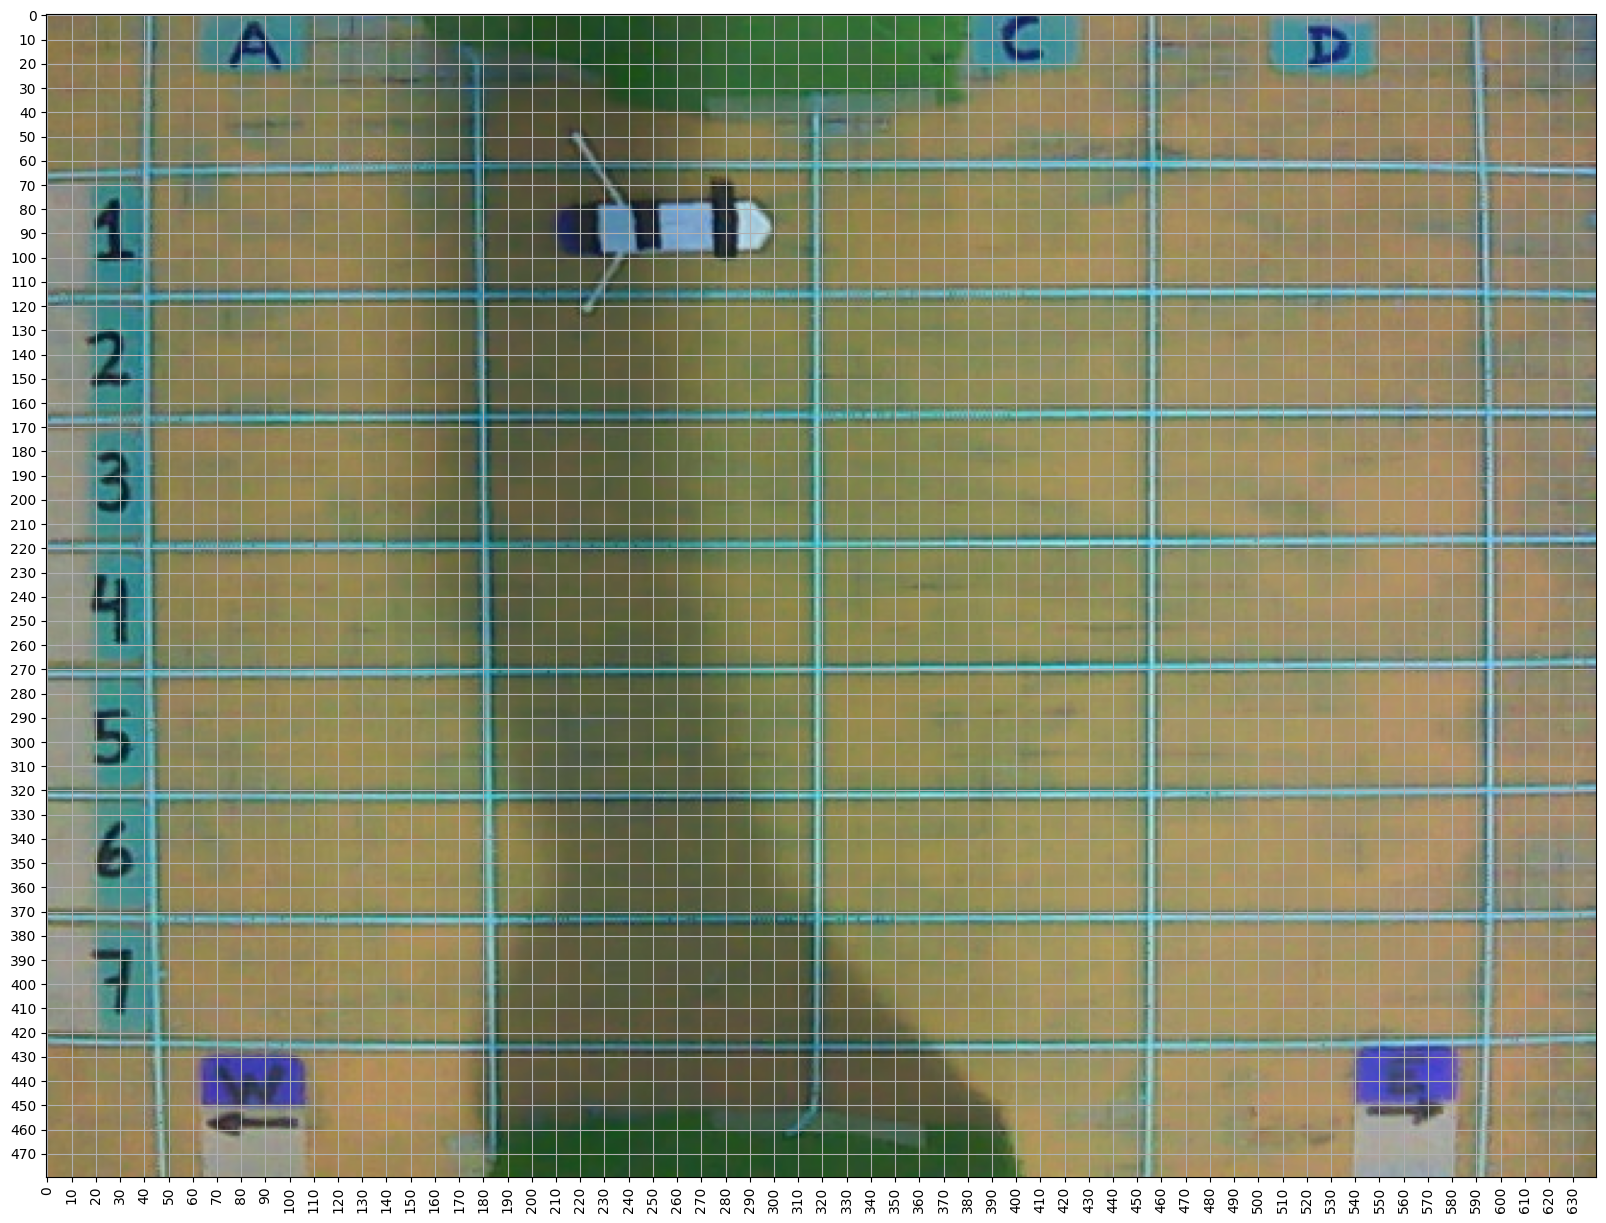

In [60]:
# show image inline
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.xticks(range(0, img.shape[1], 10), rotation=90)
plt.yticks(range(0, img.shape[0], 10))
plt.grid()
plt.imshow(img)

In [61]:
rows_ticks = [60, 115, 165, 215, 270, 320, 370, 425,]
cols_ticks = [55, 180, 320, 455, 595,]

In [62]:
class Locator:
    def __init__(self, img):
        self.img = img
        self.rows_ticks = [60, 115, 165, 215, 270, 320, 370, 425,]
        self.cols_ticks = [45, 180, 320, 455, 595,]
        self.rows_names = ["1", "2", "3", "4", "5", "6", "7",]
        self.cols_names = ["A", "B", "C", "D",]

    def find_rect_coords(self, name):
        row_name, col_name = name
        row_idx = self.rows_names.index(row_name)
        col_idx = self.cols_names.index(col_name)
        x1 = self.cols_ticks[col_idx]-5
        x2 = self.cols_ticks[col_idx+1]+5
        y1 = self.rows_ticks[row_idx]-5
        y2 = self.rows_ticks[row_idx+1]+5
        return x1, y1, x2, y2

    def show(self, name):
        x1, y1, x2, y2 = self.find_rect_coords(name)
        img = self.img.copy()
        cv.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        plt.figure(figsize=(20,20))
        plt.xticks(range(0, img.shape[1], 10), rotation=90)
        plt.yticks(range(0, img.shape[0], 10))
        plt.grid()
        plt.imshow(img)

    def crop(self, name):
        x1, y1, x2, y2 = self.find_rect_coords(name)
        return self.img[y1:y2, x1:x2].copy()


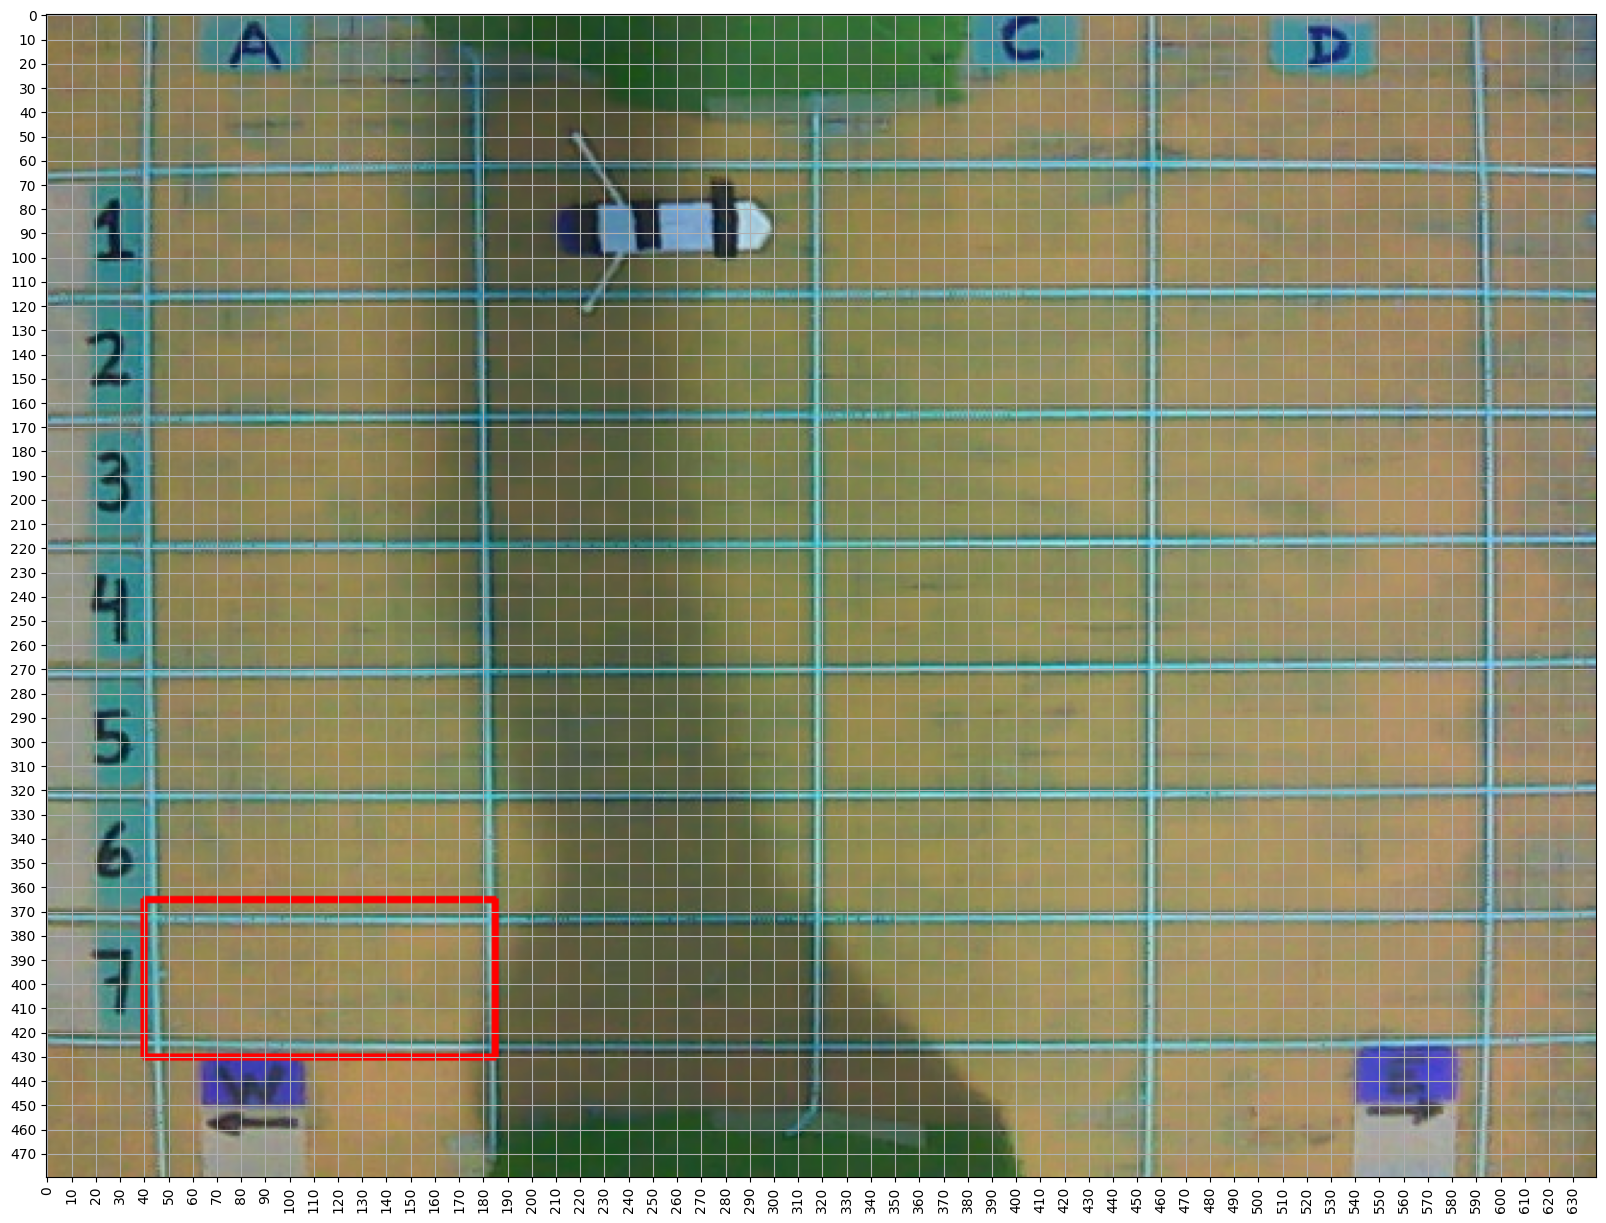

In [63]:
locator = Locator(img)
locator.show(("7", "A"))

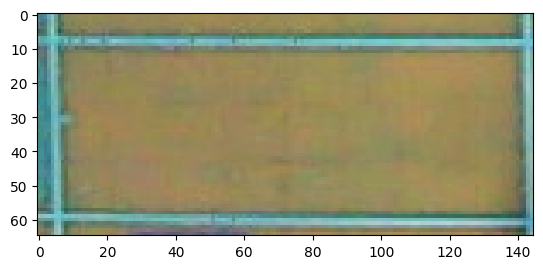

In [64]:
cropped = locator.crop("7A")
plt.imshow(cropped)

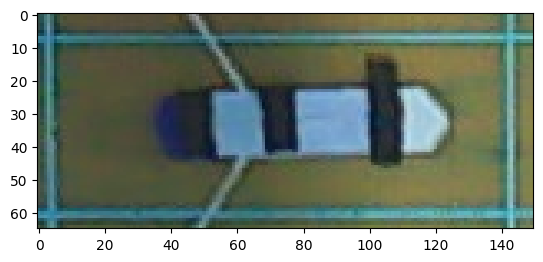

In [65]:
cropped = locator.crop("1B")
plt.imshow(cropped)

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_image_empty(image, min_contour_area=5, empty_threshold=5, show_image=True):
    """
    Determines if an image is empty based on the number of detected contours.

    Args:
        image (numpy.ndarray): Input image (BGR format).
        min_contour_area (int): Minimum contour area to consider valid.
        empty_threshold (int): Minimum number of contours required to classify as "not empty."
        show_image (bool): Whether to display the contour visualization.

    Returns:
        bool: True if the image is considered empty, False otherwise.
    """
    if image is None:
        raise ValueError("Input image is None.")

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]
    print([cv2.contourArea(c) for c in filtered_contours])
    # Determine if the image is empty
    is_empty = len(filtered_contours) < empty_threshold

    # Display contour detection result
    if show_image:
        mask = np.zeros_like(binary)
        cv2.drawContours(mask, filtered_contours, -1, 255, thickness=2)

        plt.figure(figsize=(6, 6))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Contours: {len(filtered_contours)} ({'Empty' if is_empty else 'Not Empty'})")
        plt.axis("off")
        plt.show()

    return is_empty

# Example usage:
# empty = is_image_empty(image, show_image=True)
# print(f"Is image empty? {empty}")

[170.5, 38.5, 209.5, 7480.5]


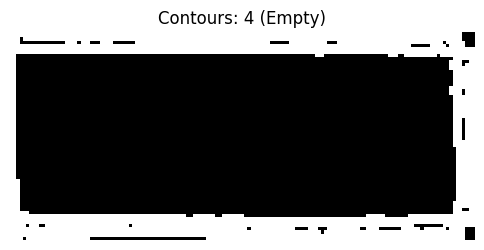

True

In [115]:
is_image_empty(locator.crop("7A"), )

[77.5, 423.0, 7757.5]


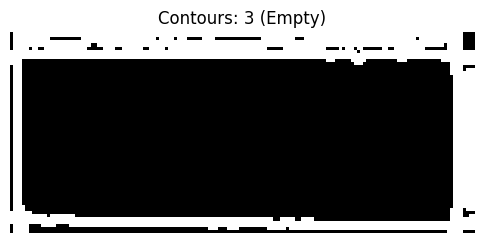

True

In [116]:
is_image_empty(locator.crop("1B"), )

In [93]:
for rows in locator.rows_names:
    for cols in locator.cols_names:
        cropped = locator.crop(rows+cols)
        fraction = fraction_of_white_pixels(cropped, show_image=False)
        print(f"Fraction of white pixels in {rows}{cols}: {fraction:.4f}")

Fraction of white pixels in 1A: 0.8622
Fraction of white pixels in 1B: 0.8004
Fraction of white pixels in 1C: 0.8419
Fraction of white pixels in 1D: 0.8518
Fraction of white pixels in 2A: 0.8772
Fraction of white pixels in 2B: 0.8671
Fraction of white pixels in 2C: 0.8675
Fraction of white pixels in 2D: 0.8771
Fraction of white pixels in 3A: 0.8913
Fraction of white pixels in 3B: 0.8613
Fraction of white pixels in 3C: 0.8732
Fraction of white pixels in 3D: 0.8900
Fraction of white pixels in 4A: 0.8836
Fraction of white pixels in 4B: 0.8644
Fraction of white pixels in 4C: 0.8587
Fraction of white pixels in 4D: 0.8475
Fraction of white pixels in 5A: 0.8767
Fraction of white pixels in 5B: 0.9181
Fraction of white pixels in 5C: 0.8957
Fraction of white pixels in 5D: 0.8550
Fraction of white pixels in 6A: 0.8784
Fraction of white pixels in 6B: 0.9382
Fraction of white pixels in 6C: 0.9059
Fraction of white pixels in 6D: 0.8911
Fraction of white pixels in 7A: 0.8471
Fraction of white pixels 

In [96]:
from tqdm import tqdm

In [97]:
images = Path("data/set-A_train").rglob("*.jpg")
empty, occupied = [], []
for image_path in tqdm(images):
    img = cv.imread(str(image_path))
    occupied_loc = None
    if not "Empty" in image_path.name:
        occupied_loc = image_path.name.split("_")[2].split("-")[1]
    locator = Locator(img)
    for rows in locator.rows_names:
        for cols in locator.cols_names:
            rect_name = rows+cols
            cropped = locator.crop(rows+cols)
            fraction = fraction_of_white_pixels(cropped, show_image=False)
            if occupied_loc is not None and rect_name == occupied_loc:
                occupied.append(fraction)
            else:
                empty.append(fraction)


1635it [00:03, 452.13it/s]


In [101]:
empty = np.array(empty)
occupied = np.array(occupied)
empty.max(), occupied.min()

(np.float64(0.9738888888888889), np.float64(0.642183908045977))